<a href="https://colab.research.google.com/github/bruno82usa/FIAP-PBL-Fase5-FarmTech/blob/main/Bruno_Gambarini_RM561517_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# --- Bloco 0: Importa√ß√£o das Bibliotecas Essenciais ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# --- Definindo cores para o print ---
VERDE = '\033[92m'
AZUL = '\033[94m'
AMARELO = '\033[93m'
VERMELHO = '\033[91m'
RESET = '\033[0m'

print(f"{VERDE}Bibliotecas importadas com sucesso!{RESET}")

Bibliotecas importadas com sucesso!


In [127]:
print("" + "="*50)
print(f"{VERDE}PROJETO PBL FASE 5 - FARMTCH SOLUTIONS{RESET}")
print("="*50)
print(f"{AMARELO}An√°lise de Dados e Machine Learning para Previs√£o de Safra{RESET}")

PROJETO PBL FASE 5 - FARMTCH SOLUTIONS
An√°lise de Dados e Machine Learning para Previs√£o de Safra


In [106]:
# ==============================================================================
# ETAPA 1: CARREGAMENTO E PREPARA√á√ÉO INICIAL DOS DADOS
# ==============================================================================

In [110]:
# --- Bloco de Carregamento e An√°lise ---
try:
    df = pd.read_csv('crop_yield.csv')
    df.rename(columns={
        'Crop': 'Cultura',
        'Precipitation (mm day-1)': 'Precipitacao',
        'Specific Humidity at 2 Meters (g/kg)': 'Umidade_Especifica',
        'Relative Humidity at 2 Meters (%)': 'Umidade_Relativa',
        'Temperature at 2 Meters (C)': 'Temperatura',
        'Yield': 'Rendimento'
    }, inplace=True)
    print(f"\n{VERDE}Arquivo 'crop_yield.csv' carregado e colunas renomeadas com sucesso!{RESET}")

except FileNotFoundError:
    print(f"\n{VERMELHO}ERRO: O arquivo 'crop_yield.csv' n√£o foi encontrado.{RESET}")
    print("Por favor, fa√ßa o upload do arquivo no menu √† esquerda do Google Colab antes de executar.")


print("\n\n" + "="*50)
print(f"{VERDE}PARTE 1: AN√ÅLISE EXPLORAT√ìRIA DE DADOS (EDA){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Conhecer os dados, suas distribui√ß√µes e correla√ß√µes.{RESET}")

print(f"\n{AZUL}--- Visualiza√ß√£o Inicial dos Dados ---{RESET}")
print(df.head())

print(f"\n{AZUL}--- Informa√ß√µes Gerais do DataFrame ---{RESET}")
df.info()

print(f"\n{AZUL}--- Descri√ß√£o Estat√≠stica dos Dados Num√©ricos ---{RESET}")
print(df.describe())

print(f"\n{AZUL}--- Verifica√ß√£o de Dados Faltantes por Coluna ---{RESET}")
print(df.isnull().sum())

print(f"\n{VERDE}--- Gerando Gr√°ficos da An√°lise Explorat√≥ria ---{RESET}")


Arquivo 'crop_yield.csv' carregado e colunas renomeadas com sucesso!


PARTE 1: AN√ÅLISE EXPLORAT√ìRIA DE DADOS (EDA)
Objetivo: Conhecer os dados, suas distribui√ß√µes e correla√ß√µes.

--- Visualiza√ß√£o Inicial dos Dados ---
        Cultura  Precipitacao  Umidade_Especifica  Umidade_Relativa  \
0  Cocoa, beans       2248.92               17.72             83.40   
1  Cocoa, beans       1938.42               17.54             82.11   
2  Cocoa, beans       2301.54               17.81             82.79   
3  Cocoa, beans       2592.35               17.61             85.07   
4  Cocoa, beans       2344.72               17.61             84.12   

   Temperatura  Rendimento  
0        26.01       11560  
1        26.11       11253  
2        26.24        9456  
3        25.56        9321  
4        25.76        8800  

--- Informa√ß√µes Gerais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column             

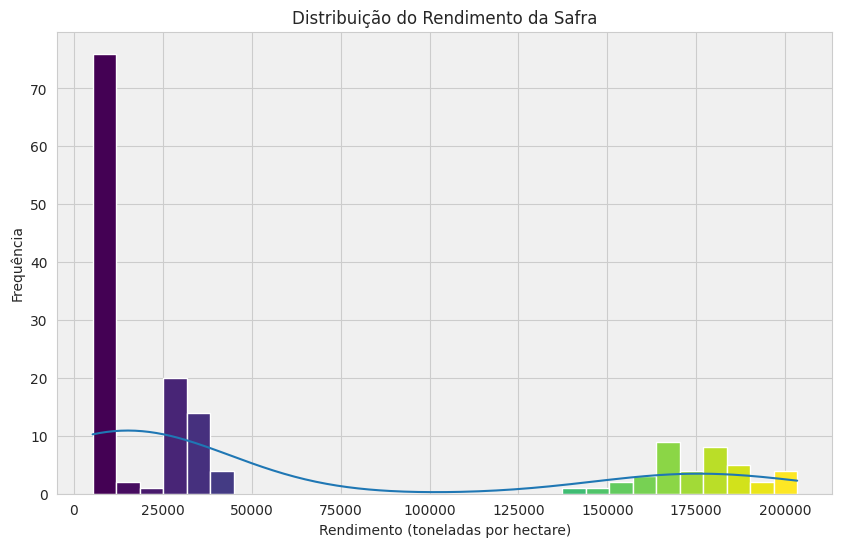

In [112]:
# Gr√°fico 1: Distribui√ß√£o do Rendimento (com cores em gradiente)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Rendimento'], kde=True, bins=30)
patches = ax.patches
cmap = plt.get_cmap('viridis')
for i, patch in enumerate(patches):
    color = cmap(i / (len(patches) - 1))
    patch.set_facecolor(color)

plt.title('Distribui√ß√£o do Rendimento da Safra')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Frequ√™ncia')
plt.grid(True)
plt.show()

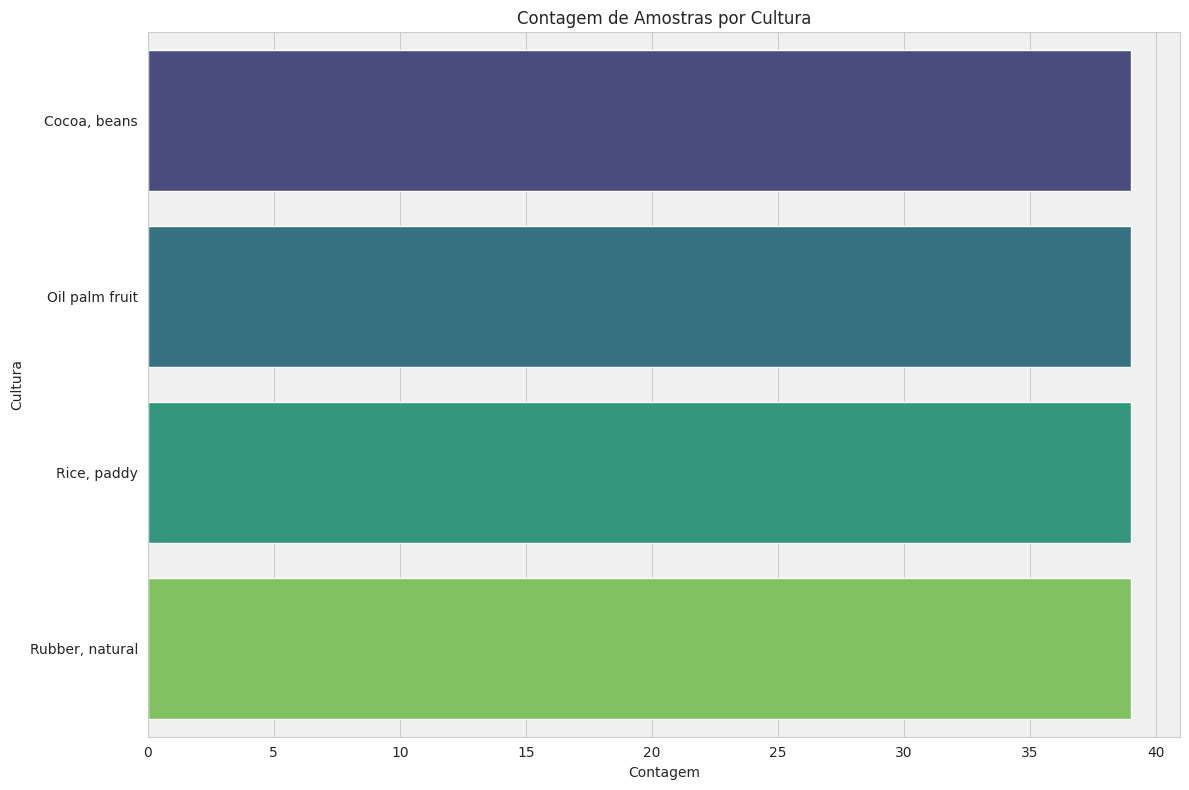

In [113]:
# Gr√°fico 2: Contagem por Cultura
plt.figure(figsize=(12, 8))
sns.countplot(
    y=df['Cultura'],
    order = df['Cultura'].value_counts().index,
    palette='viridis'
)
plt.title('Contagem de Amostras por Cultura')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.tight_layout()
plt.show()

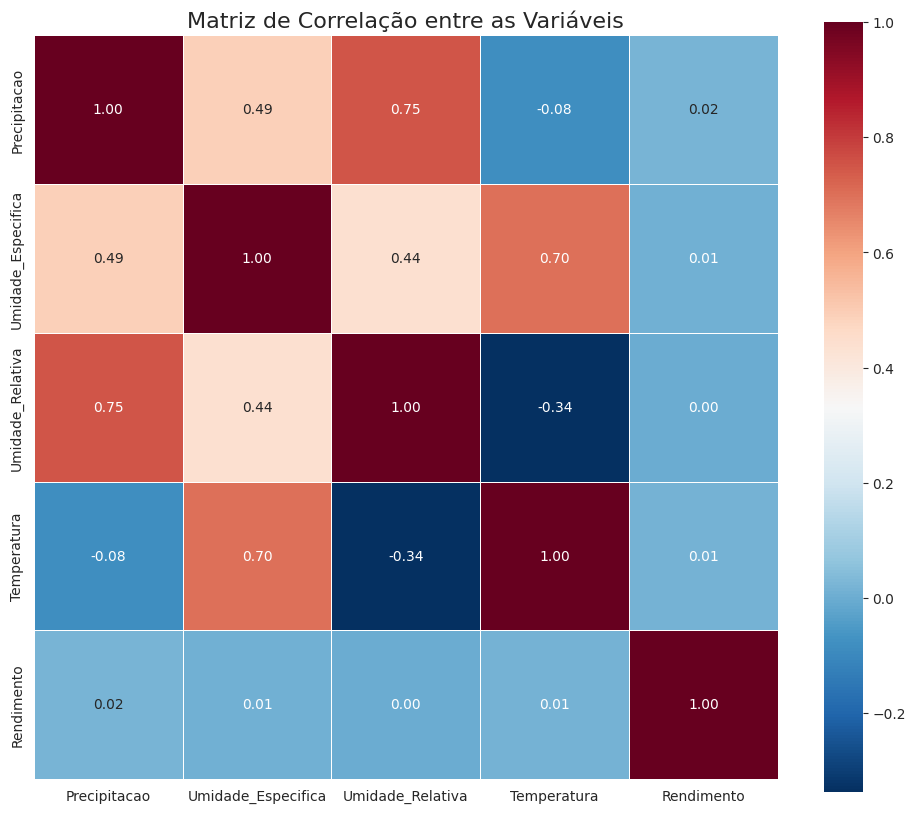

In [115]:
# Gr√°fico 3: Matriz de Correla√ß√£o
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    linewidths=.5,
    square=True
)
plt.title('Matriz de Correla√ß√£o entre as Vari√°veis', fontsize=16)
plt.show()

In [128]:
print("" + "="*50)
print(f"{VERDE}PARTE 2: AN√ÅLISE DE CLUSTERS (MACHINE LEARNING N√ÉO SUPERVISIONADO){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Encontrar tend√™ncias e grupos de safras com caracter√≠sticas similares.{RESET}")

PARTE 2: AN√ÅLISE DE CLUSTERS (MACHINE LEARNING N√ÉO SUPERVISIONADO)
Objetivo: Encontrar tend√™ncias e grupos de safras com caracter√≠sticas similares.



--- M√©todo do Cotovelo para Encontrar o 'K' Ideal ---


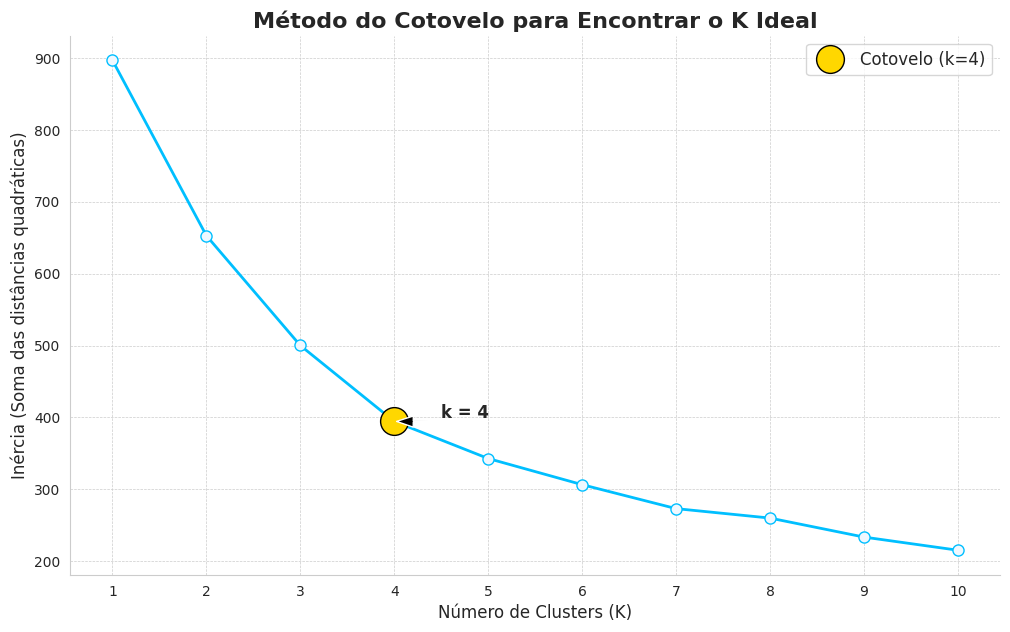

In [118]:
from matplotlib.patches import ConnectionPatch

# Pr√©-processamento dos dados para clusteriza√ß√£o
categorical_features_cluster = ['Cultura']
numerical_features_cluster = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura', 'Rendimento']
preprocessor_cluster = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features_cluster), ('cat', OneHotEncoder(), categorical_features_cluster)])
X_processed = preprocessor_cluster.fit_transform(df)

print(f"\n{VERDE}--- M√©todo do Cotovelo para Encontrar o 'K' Ideal ---{RESET}")
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

plt.plot(K_range, inertia, 'o-', color='deepskyblue', linewidth=2, markersize=8, markerfacecolor='aliceblue', markeredgecolor='deepskyblue')

# L√≥gica para encontrar o ponto do "cotovelo" (k=4 neste caso)
# Este √© um valor visualmente identificado, mas ideal para destacar
elbow_k = 4
elbow_inertia = inertia[elbow_k - 1]

plt.plot(elbow_k, elbow_inertia, 'o', markersize=20, markerfacecolor='gold', markeredgecolor='black', label=f'Cotovelo (k={elbow_k})')

# Adicionar uma anota√ß√£o elegante para o ponto
plt.annotate(
    f'k = {elbow_k}',
    xy=(elbow_k, elbow_inertia),
    xytext=(elbow_k + 0.5, elbow_inertia + 5),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    fontweight='bold'
)

# T√≠tulos e legendas
plt.xlabel('N√∫mero de Clusters (K)', fontsize=12)
plt.ylabel('In√©rcia (Soma das dist√¢ncias quadr√°ticas)', fontsize=12)
plt.title('M√©todo do Cotovelo para Encontrar o K Ideal', fontsize=16, fontweight='bold')
plt.xticks(K_range)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remover a borda superior e direita para um visual mais limpo
sns.despine()

plt.show()

In [119]:
# --- Aplica√ß√£o do K-Means e An√°lise dos Clusters ---
ideal_k = 4
print(f"\n{VERDE}O 'cotovelo' sugere K=3 ou K=4. Escolhendo K={ideal_k} para a an√°lise.{RESET}")
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_processed)

print(f"\n{AMARELO}--- An√°lise das Caracter√≠sticas M√©dias por Cluster (k={ideal_k}) ---{RESET}")
cluster_analysis = df.groupby('Cluster')[numerical_features_cluster].mean().sort_values(by='Rendimento', ascending=False)
print(cluster_analysis)


O 'cotovelo' sugere K=3 ou K=4. Escolhendo K=4 para a an√°lise.

--- An√°lise das Caracter√≠sticas M√©dias por Cluster (k=4) ---
         Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
Cluster                                                                    
3         2583.203929           18.300000         85.141071    26.189643   
2         2229.869512           17.788049         83.879512    25.977561   
0         2353.613333           18.409722         84.105556    26.505278   
1         2733.517647           18.337647         85.652353    26.118824   

            Rendimento  
Cluster                 
3        176341.500000  
2         46495.756098  
0         29671.416667  
1         16624.000000  


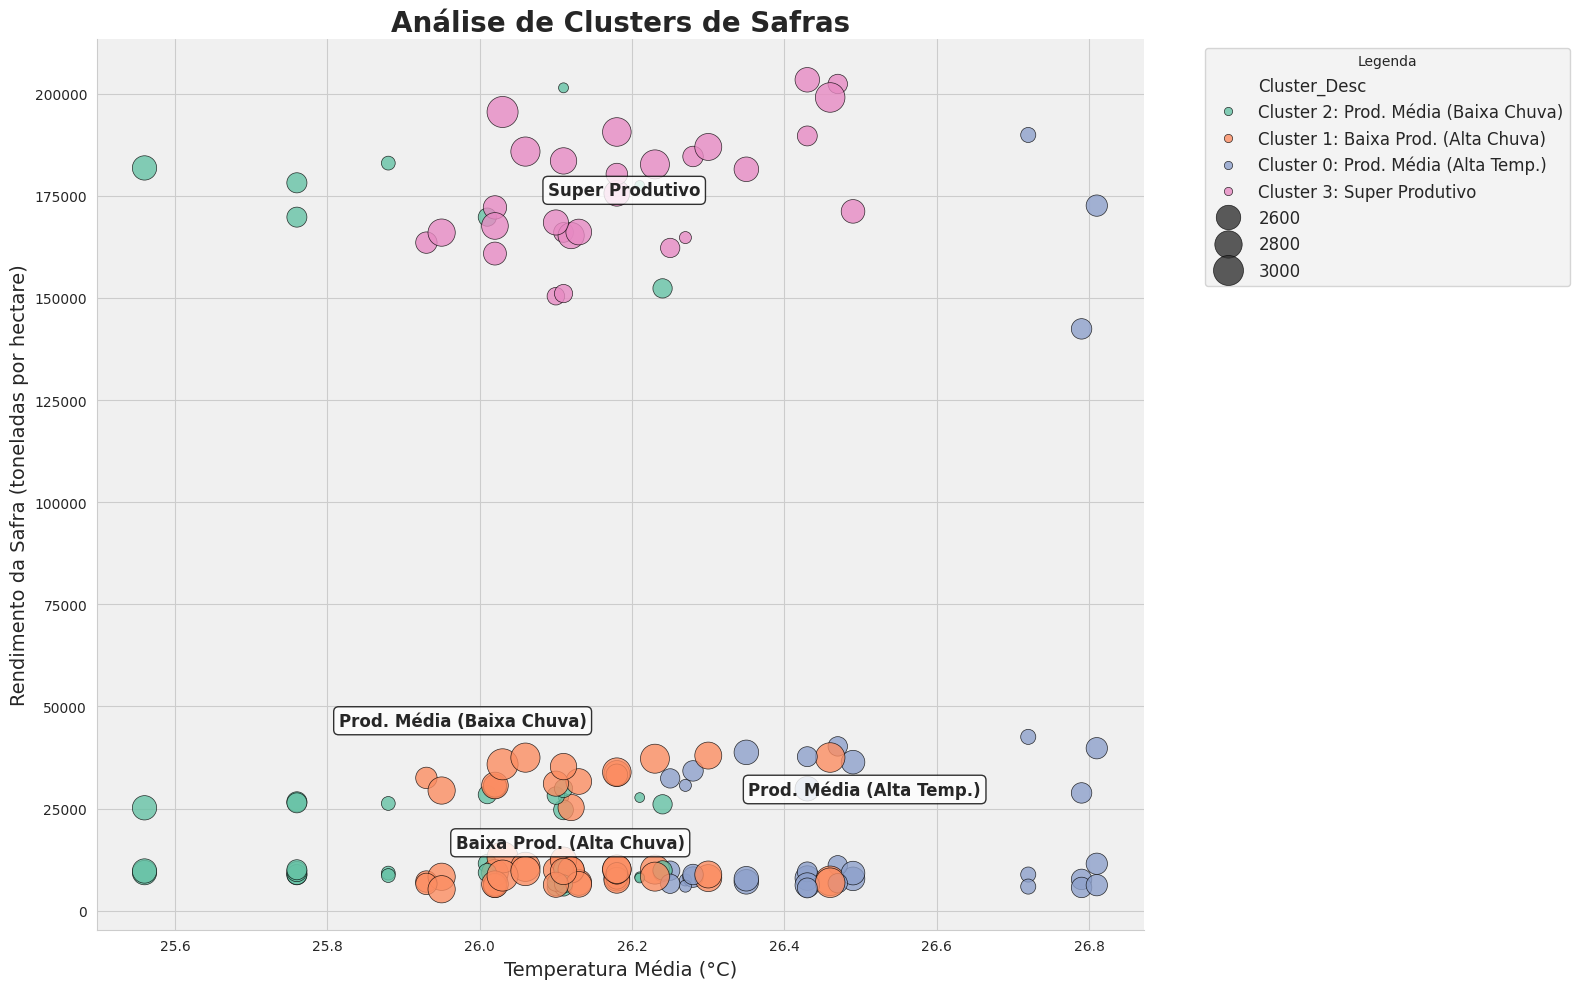

In [120]:
# --- Gr√°fico de Dispers√£o dos Clusters ---

sns.set_style("whitegrid", {'axes.facecolor': '#f0f0f0'})
plt.figure(figsize=(16, 10))

cluster_labels = {
    3: 'Cluster 3: Super Produtivo',
    2: 'Cluster 2: Prod. M√©dia (Baixa Chuva)',
    0: 'Cluster 0: Prod. M√©dia (Alta Temp.)',
    1: 'Cluster 1: Baixa Prod. (Alta Chuva)'
}
df['Cluster_Desc'] = df['Cluster'].map(cluster_labels)

# Criar o gr√°fico de dispers√£o principal
ax = sns.scatterplot(
    data=df,
    x='Temperatura',
    y='Rendimento',
    hue='Cluster_Desc',
    size='Precipitacao',
    sizes=(50, 500),
    palette='Set2',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# --- L√≥gica para adicionar os r√≥tulos no centro de cada cluster ---
for cluster_num, label in cluster_labels.items():
    # Calcular o ponto central (centroide) de cada cluster
    cluster_center = df[df['Cluster'] == cluster_num][['Temperatura', 'Rendimento']].mean()

    # Adicionar o texto no centro do cluster
    plt.text(
        x=cluster_center['Temperatura'],
        y=cluster_center['Rendimento'],
        s=label.split(':')[1].strip(), # Usar um texto mais curto para o r√≥tulo
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8)
    )

# Melhorar os t√≠tulos, legendas e eixos
plt.title('An√°lise de Clusters de Safras', fontsize=20, fontweight='bold')
plt.xlabel('Temperatura M√©dia (¬∞C)', fontsize=14)
plt.ylabel('Rendimento da Safra (toneladas por hectare)', fontsize=14)

# Personalizar a legenda
h, l = ax.get_legend_handles_labels()
plt.legend(h[0:5] + h[-3:], l[0:5] + l[-3:], title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Remover as bordas do gr√°fico para um visual mais limpo
sns.despine()
plt.tight_layout()
plt.show()

In [126]:
print("" + "="*50)
print(f"{VERDE}PARTE 3: MODELAGEM PREDITIVA (MACHINE LEARNING SUPERVISIONADO){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Criar 5 modelos para prever o rendimento e avaliar qual o melhor.{RESET}")

PARTE 3: MODELAGEM PREDITIVA (MACHINE LEARNING SUPERVISIONADO)
Objetivo: Criar 5 modelos para prever o rendimento e avaliar qual o melhor.


In [129]:
# Prepara√ß√£o dos dados para regress√£o
X = df.drop(['Rendimento', 'Cluster'], axis=1)
y = df['Rendimento']
categorical_features_model = ['Cultura']
numerical_features_model = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']
preprocessor_model = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features_model), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_model)])

# Divis√£o em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n{VERDE}--- Prepara√ß√£o de Dados para Modelagem ---{RESET}")
print(f"Dados divididos em treino ({len(X_train)} amostras) e teste ({len(X_test)} amostras).")


--- Prepara√ß√£o de Dados para Modelagem ---
Dados divididos em treino (124 amostras) e teste (32 amostras).


In [130]:
# ==============================================================================
# ETAPA FINAL: TREINAMENTO E AVALIA√á√ÉO DOS MODELOS PREDITIVOS üöÄ
# ==============================================================================

# --- Defini√ß√£o dos Modelos ---
# Foi criado um dicion√°rio onde cada chave √© o nome de um algoritmo de regress√£o
# e o valor √© o pr√≥prio objeto do modelo, pronto para ser treinado.
# Isso nos permite iterar sobre eles de forma organizada.
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf')
}

# Dicion√°rio vazio para armazenar os resultados (m√©tricas) de cada modelo.
results = {}

print(f"\n{AMARELO}--- Treinando e Avaliando os 5 Modelos ---{RESET}")
print("Para cada modelo, o processo √© o seguinte:")
print("1. Cria-se um 'Pipeline' que primeiro pr√©-processa os dados e depois treina o modelo.")
print("2. O modelo √© treinado com os dados de treino.")
print("3. O modelo faz previs√µes nos dados de teste (que ele nunca viu antes).")
print("4. As previs√µes s√£o comparadas com os valores reais para calcular as m√©tricas de performance.")
print("-" * 30)

# --- Loop de Treinamento e Avalia√ß√£o ---
# Este loop passar√° por cada um dos 5 modelos que definimos acima.
for name, model in models.items():
    try:
        # O Pipeline √© uma das melhores pr√°ticas em Machine Learning.
        # Ele garante que o pr√©-processamento (como o StandardScaler) seja
        # ajustado APENAS com os dados de treino, evitando vazamento de dados.
        pipeline = Pipeline(steps=[('preprocessor', preprocessor_model),
                                   ('regressor', model)])

        # 1. Treinamento: O modelo "aprende" os padr√µes dos dados de treino.
        pipeline.fit(X_train, y_train)

        # 2. Previs√£o: O modelo treinado tenta prever o rendimento para os dados de teste.
        y_pred = pipeline.predict(X_test)

        # 3. Avalia√ß√£o: Calculamos o qu√£o boas foram as previs√µes.
        # MAE (Erro Absoluto M√©dio): A m√©dia de erro das previs√µes. Quanto menor, melhor.
        mae = mean_absolute_error(y_test, y_pred)
        # R¬≤ Score: Explica a porcentagem da varia√ß√£o que o modelo consegue prever. Quanto mais perto de 1, melhor.
        r2 = r2_score(y_test, y_pred)

        # 4. Armazenamento: Guardamos as m√©tricas no nosso dicion√°rio de resultados.
        results[name] = {'MAE': mae, 'R2 Score': r2}

        # Feedback visual colorido sobre a performance do modelo.
        if r2 >= 0:
            print(f"‚úÖ {VERDE}- Modelo '{name}' avaliado com sucesso.{RESET}")
        else:
            print(f"‚ùå {VERMELHO}- Modelo '{name}' apresentou performance ruim (R¬≤ negativo).{RESET}")

    except Exception as e:
        print(f"‚ùå {VERMELHO}- Modelo '{name}' falhou durante o treinamento. Erro: {e}{RESET}")


--- Treinando e Avaliando os 5 Modelos ---
Para cada modelo, o processo √© o seguinte:
1. Cria-se um 'Pipeline' que primeiro pr√©-processa os dados e depois treina o modelo.
2. O modelo √© treinado com os dados de treino.
3. O modelo faz previs√µes nos dados de teste (que ele nunca viu antes).
4. As previs√µes s√£o comparadas com os valores reais para calcular as m√©tricas de performance.
------------------------------
‚úÖ - Modelo 'Linear Regression' avaliado com sucesso.
‚úÖ - Modelo 'Random Forest' avaliado com sucesso.
‚úÖ - Modelo 'Decision Tree' avaliado com sucesso.
‚úÖ - Modelo 'Gradient Boosting' avaliado com sucesso.
‚ùå - Modelo 'Support Vector Regressor (SVR)' apresentou performance ruim (R¬≤ negativo).
